## Architecture:
**Vgg16** is built on top of **Keras** which sits on top of **Theano** (in our case but it can also be Tensorflow) which in turn sits on top of **CUDA** (cuDNN.)

### Note:
1) To use Tensorflow as the Keras backend instead of Theano (for using multiple GPUs to achieve higher accuracy later on) change the configurations in *~/.keras/keras.json*

2) For switching between GPU (if a GPU is available) and CPU usage in Theano change the configuration in *~/.theanorc*

In [10]:
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [11]:
# Contains some utilty functions
import utils; reload(utils)
from utils import plots
# Contains the trained Vgg16 model (2014 winner of ImageNet)
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [25]:
# For showing the plots in this webpage
%matplotlib inline

In [24]:
# Path containing input data items
# path = "../data/dogscats/"
path = "../data/dogscats/sample/"

No larger than 64 batch size is recommended. 

The idea of a batch is to keep most (ideally all) of the GPU busy processing images; using just one image at a time is not fully utilizing all the cores in the GPU but using the entire data set is also not possible due to the memory constraints on the GPU.

In [28]:
# If running out of memory or using an older GPU, decrease this number
batch_size = 4

In [30]:
vgg = Vgg16()
# Grab a few images at a time for training and validation
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


We can first see a batch of images and the labels images in this batch have.

In [31]:
imgs, labels = next(batches)

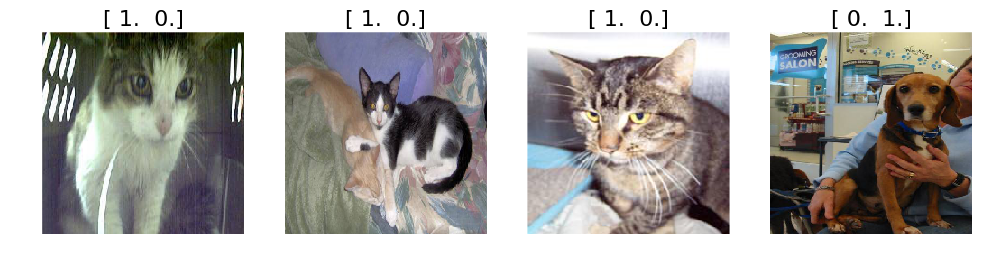

In [32]:
plots(imgs, titles=labels)

Then we use the same images and ignore their original labels and make the pre-trained Vgg16 model classify these images (to see what the model thinks these images are.)

The output will contain probabilities, class indices and class names.

In [33]:
vgg.predict(imgs, True)

(array([ 0.0493,  0.2421,  0.7001,  0.2652], dtype=float32),
 array([370, 158, 281, 237]),
 [u'guenon', u'toy_terrier', u'tabby', u'miniature_pinscher'])

However, at this stage, the classes can be any of the 1000 classes that the Vgg16 model is already trained on. To tailor this model for our needs, we can **finetune** it so that it takes in our training data (from the batches we created above) and only classifies the images using the classes we have labeled our training data with. 

(The way it identifies which classes the training data can have is by following the directory structure of the *dogscats* data set.)

In [37]:
vgg.finetune(batches)

Now we **fit** the parameters of the model using training data and the accuracy is reported on the validation set after each epoch. 

(An epoch is one full pass through the training data.)

In [40]:
vgg.fit(batches, val_batches, nb_epoch=5)

Epoch 1/5
16/16 [==============================] - 7s - loss: 7.3768e-04 - acc: 1.0000 - val_loss: 0.5081 - val_acc: 0.8750
Epoch 2/5
16/16 [==============================] - 7s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4729 - val_acc: 0.7500
Epoch 3/5
16/16 [==============================] - 7s - loss: 6.3771e-04 - acc: 1.0000 - val_loss: 0.4566 - val_acc: 0.7500
Epoch 4/5
16/16 [==============================] - 8s - loss: 7.1435e-05 - acc: 1.0000 - val_loss: 0.4479 - val_acc: 0.7500
Epoch 5/5
16/16 [==============================] - 8s - loss: 4.3203e-04 - acc: 1.0000 - val_loss: 0.4433 - val_acc: 0.7500
